## Simulating Sample Paths
### ACT460, Fall 2024

In this tutorial, we study different ways to simulate geometric Brownian motion.

In [1]:
# load Python packages
import numpy as np  # for numerical python libraries
import matplotlib.pyplot as plt  # for plotting

## Exact simulation of GBMs

In this example, we simulate exactly sample paths from a geometric Brownian motion (GBM) and inspect the effects of the different parameters. Recall that GBM has SDE
$$ dS_t = \mu S_t dt + \sigma S_t dW_t$$

In [2]:
def simulate_GBM_exact(S0, mu, sigma, T, Ndt, Nsims=10):
    """
    Simulate two-dimensional Geometric Brownian Motion with correlation rho.

    Parameters:
    S0 : float
        Initial value of the process.
    mu : float
        Drift coefficient of the process.
    sigma : float
        Volatility coefficient of the process.
    T : float
        Total time period to simulate.
    Ndt : float
        Number of time steps to take.

    Returns:
    prices : ndarray
        Simulated process over time.
    """
        
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize the matrix for GBMs
    S = np.zeros((Ndt+1,Nsims))
    
    # initial value of the process
    S[0,:] = S0
    
    # recursively simulate the process ( S[idx,:] is (1 , Nsims) )
    for idx in range(Ndt):
        Z = np.random.randn(Nsims)
        # or Z = np.random.normal(0.0, 1.0, size=(1,Nsims))
        S[idx+1,:] = S[idx,:] * np.exp( (mu - (sigma**2)/2) * dt
                                      + sigma * np.sqrt(dt) * Z)
    
    return time, S

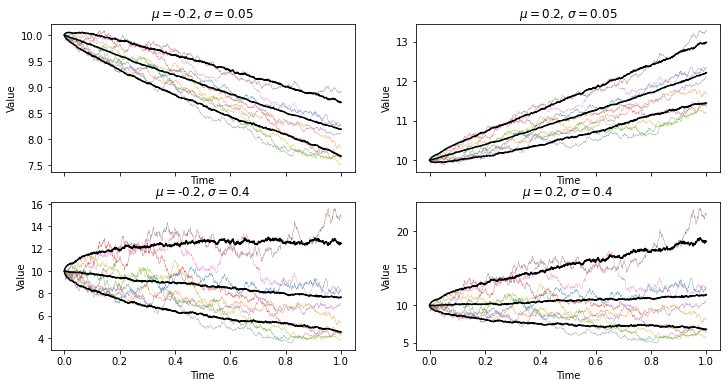

In [3]:
# initialize different parameters for the GBM
S0 = 10
mus = [-0.2, 0.2]
sigmas = [0.05, 0.4]
T = 1
Ndt = 1000
Nsims = 500

fig, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True)
for idx_row, row in enumerate(axes):
    for idx_col, col in enumerate(row):
        # simulate GBMs for set of parameters
        np.random.seed(460)
        t, price = simulate_GBM_exact(S0, mus[idx_col], sigmas[idx_row], T, Ndt, Nsims)
        
        # plot the sample paths
        col.plot(t, price[:,1:10], linewidth=0.3)
        col.plot(t, np.quantile(price, [0.1, 0.5, 0.9], axis=1).transpose(), 
                  linewidth=1.5, color='black')
        col.set_title(r"$\mu=$" + str(mus[idx_col]) + r", $\sigma=$" + str(sigmas[idx_row]))
        col.set_xlabel('Time')
        col.set_ylabel('Value')
plt.show()

## Simulation of multi-dimensional GBMs

In this example, we modify the previous function to generate a 2-dimensional correlated GBM.

In [4]:
def simulate_corr_GBM_2d(S0, mu, sigma, rho, T, Ndt, Nsims=10):
    """
    Simulate two-dimensional Geometric Brownian Motion with correlation rho.

    Parameters:
    S0 : array_like
        Initial value for each process.
    mu : array_like
        Drift coefficients for each process.
    sigma : array_like
        Volatility coefficients for each process.
    rho : float
        Correlation coefficient of the processes.
    T : float
        Total time period to simulate.
    Ndt : float
        Number of time steps to take.

    Returns:
    prices : ndarray
        Simulated processes over time.
    """
        
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize the matrix for GBMs
    S = np.zeros((2,Ndt+1,Nsims))
    
    # initial value of the process
    S[:,0,:] = np.repeat(S0[:,np.newaxis], Nsims, axis=1)
    
    # reshape some parameters
    mu_reshape = np.repeat(mu[:,np.newaxis], Nsims, axis=1)
    sigma_reshape = np.repeat(sigma[:,np.newaxis], Nsims, axis=1)
    
    # rho matrix
    rho_mat = np.array([[1, 0],[rho, np.sqrt(1 - rho**2)]])
    
    # recursively simulate the process ( S[:,idx,:] is (2 , Nsims) )
    for idx in range(Ndt):
        Z = np.random.normal(0.0, 1.0, size=(2,Nsims))
        normals = rho_mat @ Z
        
        S[:,idx+1,:] = S[:,idx,:] * np.exp( (mu_reshape - (sigma_reshape**2)/2) * dt
                                      + sigma_reshape * np.sqrt(dt) * normals)
    
    return time, S

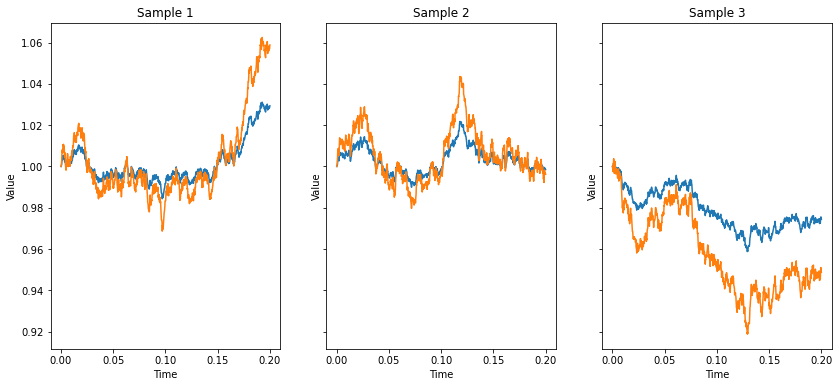

In [5]:
# initialize parameters
S0 = np.array([1.0, 1.0])
mu = np.array([0.03, 0.06])
sigma = np.array([0.06, 0.12])
rho = 0.2
T = 1
Ndt = 2**10
Nsims = 3

# simulate GBMs for set of parameters
np.random.seed(460)
t, price = simulate_corr_GBM_2d(S0, mu, sigma, T, rho, Ndt, 3)
    
fig, axes = plt.subplots(1, int(Nsims), figsize=(14,6), sharex=True, sharey=True)
for idx_row, ax in enumerate(axes.reshape(-1)):       
    # plot the sample paths
    ax.plot(t, price[0,:,idx_row], linewidth=1.5)
    ax.plot(t, price[1,:,idx_row], linewidth=1.5)
    ax.set_title('Sample {:d}'.format(idx_row+1))
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
plt.show()

## Exercise
Modify the code to simulate $n$-dimensional GBM with a given variance-covariance matrix. Follow page 90-91 of the Glasserman book. Note that `rho_mat` above is the Cholesky decomposition of 
$$\begin{bmatrix}
    1 & \rho\\
    \rho & 1
  \end{bmatrix} $$
If the variance-covariance matrix is `corr_mat`, the Cholesky decomposition is `np.linalg.cholesky(corr_matrix)`.


In [ ]:
def simulate_corr_GBM_multi(S0, mu, sigma, corr_matrix, T, Ndt, Nsims=10):
    """
    Simulate two-dimensional Geometric Brownian Motion with correlation rho.

    Parameters:
    S0 : array_like
        Initial values for each process.
    mu : array_like
        Drift coefficients for each process.
    sigma : array_like
        Volatility coefficients for each process.
    corr_mat : array_like
        Correlation matrix for the processes.
    T : float
        Total time period to simulate.
    Ndt : float
        Number of time steps to take

    Returns:
    prices : ndarray
        Simulated processes over time
    """
        
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize the matrix for GBMs
    ?
    
    # use the Cholesky decomposition
    B = np.linalg.cholesky(corr_matrix)
    
    # recursively simulate the process ( S[:,idx,:] is (? , Nsims) )
    for idx in range(Ndt):
        ?
        
        S[:,idx+1,:] = ?
    
    return time, S

In [ ]:
# initialize parameters
S0 = np.array([1.0, 1.0, 1.0])
mu = np.array([0.03, 0.06, 0.09])
sigma = np.array([0.06, 0.12, 0.18])
corr_matrix = np.array([[1, 0.2, 0.2],
                        [0.2, 1, 0.2],
                        [0.2, 0.2, 1]])
T = 1
Ndt = 2**10
Nsims = 3

# simulate GBMs for set of parameters
np.random.seed(460)
t, price = simulate_corr_GBM_multi(S0, mu, sigma, corr_matrix, T, Ndt, Nsims**2)

    
fig, axes = plt.subplots(1, int(Nsims), figsize=(14,6), sharex=True, sharey=True)
for idx_row, ax in enumerate(axes.reshape(-1)):       
    # plot the sample paths
    ax.plot(t, price[0,:,idx_row], linewidth=1.5)
    ax.plot(t, price[1,:,idx_row], linewidth=1.5)
    ax.plot(t, price[2,:,idx_row], linewidth=1.5)
    ax.set_title('Sample {:d}'.format(idx_row+1))
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
plt.show()

## Implementation of different discretization schemes for GBM

In this example, we compare the different discretization schemes when generating paths of geometric Brownian motion.

##### Euler scheme

For the Euler scheme, we can show that
\begin{equation*}
   S_{i+1} = S_i + \mu S_i \Delta t_i + \sigma S_i \Delta W_i
\end{equation*}

In [6]:
def sim_GBM_euler(S0, mu, sigma, T, Ndt, Nsims=100):
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize matrix for price
    S = np.zeros((Ndt+1,Nsims))
    
    # initial value of the process
    S[0,:] = S0
    
    # recursively simulate the processes
    for idx in range(Ndt):
        # random values for W
        Z = np.random.randn(Nsims)
        
        S[idx+1,:] = S[idx,:] * (1 + mu*dt + sigma*np.sqrt(dt)*Z)
    
    return time, S

##### Milstein scheme

For the Milstein scheme, we can show that
\begin{align*}
   S_{i+1} &= S_i + \mu S_i \Delta t_i + \sigma S_i \Delta W_i \\
   &\qquad + \frac{1}{2} \sigma^2 S_i \Big( (\Delta W_i)^2 - \Delta t_i \Big)
\end{align*}

In [7]:
def sim_GBM_milstein(S0, mu, sigma, T, Ndt, Nsims=100):
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize matrix for price
    S = np.zeros((Ndt+1,Nsims))
    
    # initial value of the process
    S[0,:] = S0
    
    # recursively simulate the processes
    for idx in range(Ndt):
        # random values for W^{S}
        Z = np.random.randn(Nsims)
                
        S[idx+1,:] = S[idx,:] * (1 + mu * dt + sigma*np.sqrt(dt)*Z) \
                        + 0.5 * S[idx,:] * sigma**2 * dt * (Z**2 - 1)
    
    return time, S

##### Second-order scheme

For the second-order scheme, we can show that
\begin{align*}
   S_{i+1} &= S_i + \mu S_i \Delta t_i + \sigma S_i \Delta W_i \\
   &\qquad + \frac{1}{2} \sigma^2 S_i \Big( (\Delta W_i)^2 - \Delta t_i \Big) \\
   &\qquad + \mu S_i \sigma \Delta W_i \Delta t_i + \frac{1}{2} \mu^2 S_i (\Delta t_i)^2
\end{align*}

In [8]:
def sim_GBM_2order(S0, mu, sigma, T, Ndt, Nsims=100):
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize matrix for price
    S = np.zeros((Ndt+1,Nsims))
    
    # initial value of the process
    S[0,:] = S0
    
    # recursively simulate the processes
    for idx in range(Ndt):
        # random values for W^{S}
        Z = np.random.randn(Nsims)
        
        S[idx+1,:] = S[idx,:] * (1 + mu*dt + sigma*np.sqrt(dt)*Z) \
                        + 0.5 * S[idx,:] * sigma**2 * dt * (Z**2 - 1) \
                        + 0.5 * dt**2 * mu**2 * S[idx,:] \
                        + mu * S[idx,:] * sigma * (dt * np.sqrt(dt)*Z)
    
    return time, S

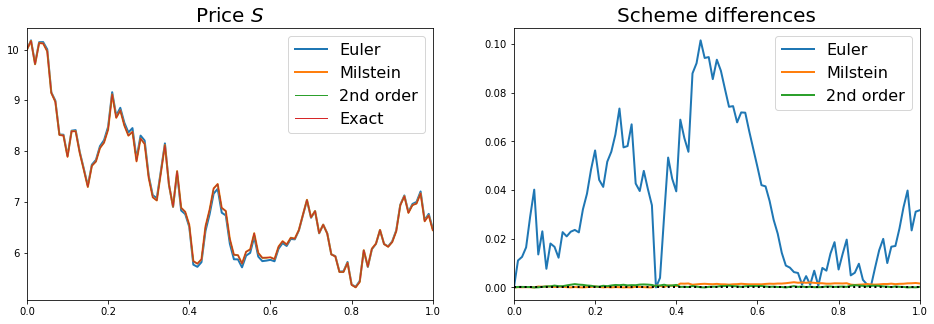

In [9]:
# initialization of all parameters
S0 = 10
mu = 0.05
sigma = 0.5
T = 1
Ndt = 100

# comparison of the different discretization methods
np.random.seed(460)
time_E, S_E = sim_GBM_euler(
    S0, mu, sigma, T, Ndt, Nsims=10)
np.random.seed(460)
time_M, S_M = sim_GBM_milstein(
    S0, mu, sigma, T, Ndt, Nsims=10)
np.random.seed(460)
time_2nd, S_2nd = sim_GBM_2order(
    S0, mu, sigma, T, Ndt, Nsims=10)
np.random.seed(460)
time, S = simulate_GBM_exact(
    S0, mu, sigma, T, Ndt, Nsims=10)

# plot visually the trajectories of S
fig, axes = plt.subplots(1,2,figsize=(16,5), sharex=True)
axes[0].plot(time_E, S_E[:,0], linewidth=2.0, color='C0', label="Euler")
axes[0].plot(time_M, S_M[:,0], linewidth=2.0, color='C1', label="Milstein")
axes[0].plot(time_2nd, S_2nd[:,0], linewidth=1.0, color='C2', label="2nd order")
axes[0].plot(time, S[:,0], linewidth=1.0, color='C3', label="Exact")
axes[0].set_xlim(0,T)
axes[0].set_title(r"Price $S$", fontsize=20)
axes[0].legend(fontsize=16)
axes[1].plot(time_E, np.abs(S_E[:,0]-S[:,0]), linewidth=2.0, color='C0', label="Euler")
axes[1].plot(time_M, np.abs(S_M[:,0]-S[:,0]), linewidth=2.0, color='C1', label="Milstein")
axes[1].plot(time_2nd, np.abs(S_2nd[:,0]-S[:,0]), linewidth=2.0, color='C2', label="2nd order")
axes[1].axhline(0, linewidth=2.0, color='black', linestyle=':')
axes[1].set_title(r"Scheme differences", fontsize=20)
axes[1].legend(fontsize=16)
plt.show()